In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline

# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [9]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
# businesses.head()
# dtype casts the column as a specific data type

In [10]:
# Some EDA I did before looking at inspections, violations and starting #1

# businesses.shape
# businesses.isnull().sum()
# businesses.city.describe()
# businesses.columns

In [11]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
#inspections.head()

In [12]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
#violations.head()

In [13]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

merge_in_vi = pd.merge(inspections, violations, on=['business_id', 'date'], how='left')
restaurant_scores = pd.merge(businesses, merge_in_vi, on=['business_id'], how='left')
#restaurant_scores.head()
#restaurant_scores.shape

In [14]:
# 2 Which ten business have had the most inspections?

restaurant_scores.name.value_counts().head(10)

Peet's Coffee & Tea           151
Starbucks Coffee              100
Whole Foods Market             97
Specialty's Cafe & Bakery      88
KENTUCKY FRIED CHICKEN         80
Lers Ros Thai Noodle           78
San Francisco Soup Company     74
King of Thai Noodle House      69
Cafe Bakery                    67
Yama Sushi Restaurant          66
Name: name, dtype: int64

In [15]:
# 3 Group and count the inspections by type

restaurant_scores.type.value_counts()

Routine - Unscheduled                42054
Reinspection/Followup                 6020
Complaint                             3150
New Ownership                         2660
New Construction                      1635
Non-inspection site visit             1003
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  141
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

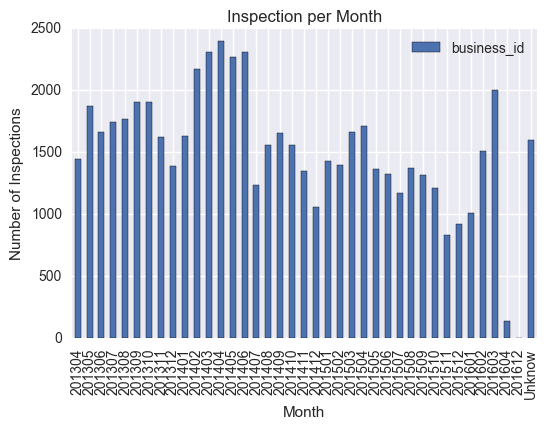

In [16]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

# Check date for null values
restaurant_scores.date.isnull().sum()

# Replace null values in date
restaurant_scores.date.dropna()
restaurant_scores.date.fillna(value="Unknown", inplace=True)

# Check how many years are represented

restaurant_scores.date.value_counts()

# Create new column with just year and month string from date 
restaurant_scores['year_month'] = restaurant_scores.date.apply(lambda x: str(x)[:6])

# Check restaruant_scores to see if new column 'year_month' was added
restaurant_scores.head()

# Create new data frame using business_id and year_month, organize by  
func = restaurant_scores[['business_id', 'year_month']].sort_values(by='year_month', ascending=True)
func_sort = pd.DataFrame(func.groupby('year_month').business_id.count())

func_sort.plot(kind='bar', title='Inspection per Month')
plt.xlabel('Month')
plt.ylabel('Number of Inspections')

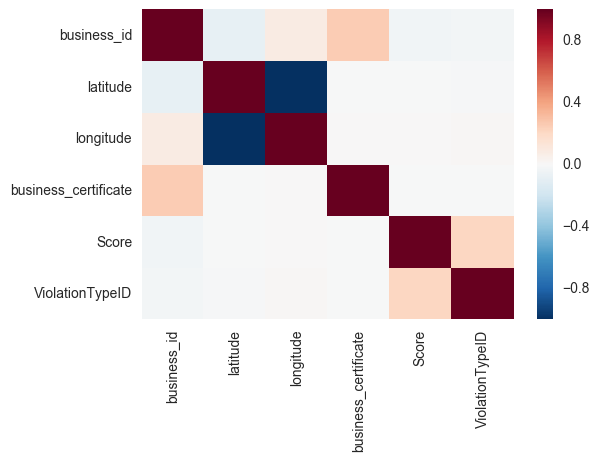

In [17]:
# This is a general heatmap for the whole dataframe...will keep trying and push to GitHub by Saturday, October 29 if successful 

sns.heatmap(restaurant_scores.corr())

In [18]:
# 5 Which zip code contains the most high risk violations?

restaurant_scores.owner_zip.value_counts().head(1)

94110    4510
Name: owner_zip, dtype: int64

In [19]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

new_owner = restaurant_scores[restaurant_scores.type=='New Ownership']
new_owner.risk_category.value_counts()

Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

In [20]:
# 7 Examining the descriptions, what is the most common violation?

restaurant_scores.ViolationTypeID.value_counts()

viol_desc=restaurant_scores[['ViolationTypeID', 'description']]
viol_desc[restaurant_scores.ViolationTypeID==103154.0].head()

,ViolationTypeID,description
4,103154.0,Unclean or degraded floors walls or ceilings
12,103154.0,Unclean or degraded floors walls or ceilings
13,103154.0,Unclean or degraded floors walls or ceilings
21,103154.0,Unclean or degraded floors walls or ceilings
29,103154.0,Unclean or degraded floors walls or ceilings


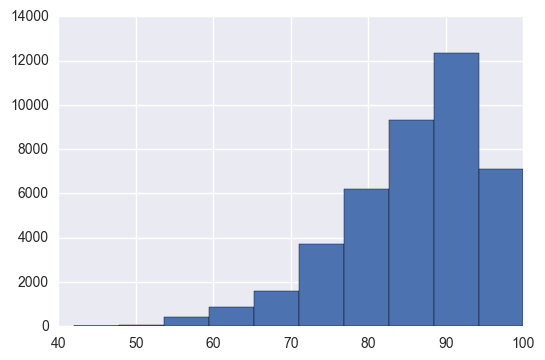

In [21]:
# 8 Create a hist of the scores with 10 bins

restaurant_scores.Score.hist(bins=10)

In [22]:
# 9 Can you predict risk category based on the other features in this dataset?

# Incomplete...will finish Saturday, Oct. 29 and push to GitHub
restaurant_scores.type.value_counts()

Routine - Unscheduled                42054
Reinspection/Followup                 6020
Complaint                             3150
New Ownership                         2660
New Construction                      1635
Non-inspection site visit             1003
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  141
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [23]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [24]:
############################
### A Little More Morbid ###
############################

import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [26]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace='True')
#killings.head()

In [27]:
# 2. Show the count of missing values in each column

killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [28]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings.dropna()
killings.fillna(value="Unknown", inplace=True)

# killings.isnull().sum()

In [29]:
# 4. How many killings were there so far in 2015?

# Check to make sure only 2015 is in data frame
# killings.year.unique()

killings.year.count()

467

In [30]:
# 5. Of all killings, how many were male and how many female?

male_count = killings[killings.gender=='Male'].gender.count()
female_count = killings[killings.gender=='Female'].gender.count()

print male_count
print female_count

445
22


In [31]:
# 6. How many killings were of unarmed people?

unarmed_count = killings[killings.armed=='No'].armed.count()

print unarmed_count

102


In [32]:
# 7. What percentage of all killings were unarmed?

perc_unarmed = unarmed_count/killings.armed.count()

print perc_unarmed

0.218415417559


In [33]:
# 8. What are the 5 states with the most killings?

killings.state.value_counts().head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [34]:
# 9. Show a value counts of deaths for each race

killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

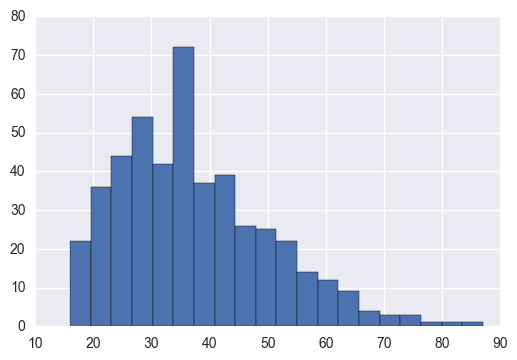

In [35]:
# 10. Display a histogram of ages of all killings

killings.age.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9bee50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ae82490>]], dtype=object)

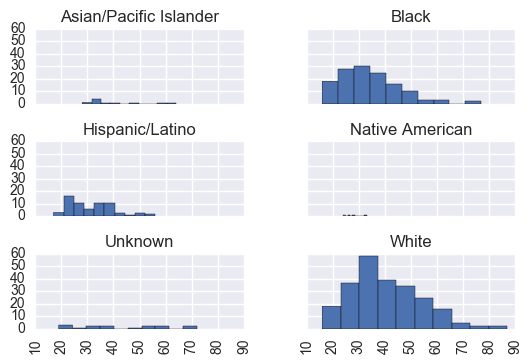

In [36]:
# 11. Show 6 histograms of ages by race

killings.age.hist(by=killings.race, sharex=True, sharey=True)

In [37]:
# 12. What is the average age of death by race?

killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

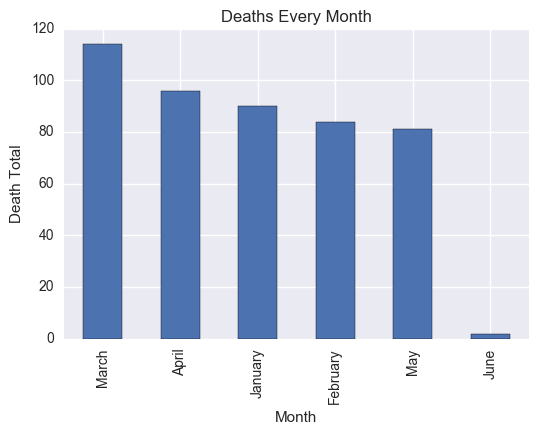

In [38]:
# 13. Show a bar chart with counts of deaths every month

killings.month.value_counts().plot(kind='bar', title='Deaths Every Month')
plt.xlabel('Month')
plt.ylabel('Death Total')

In [39]:
###################
### Less Morbid ###
###################

In [40]:
majors = pd.read_csv('./data/college-majors.csv')
#majors.head()

In [41]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

majors.drop(['Employed_full_time_year_round', 'Major_code'], axis=1, inplace=True)
#majors.head()

In [42]:
# 2. Show the cout of missing values in each column

majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [43]:
# 3. What are the top 10 highest paying majors?

high_pay_majors = majors[['Major', 'Median']].sort_values(by='Median', ascending=False).head(10)

print high_pay_majors.head()

                                                 Major  Median
59                               PETROLEUM ENGINEERING  125000
154  PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...  106000
57           NAVAL ARCHITECTURE AND MARINE ENGINEERING   97000
55                           METALLURGICAL ENGINEERING   96000
58                                 NUCLEAR ENGINEERING   95000


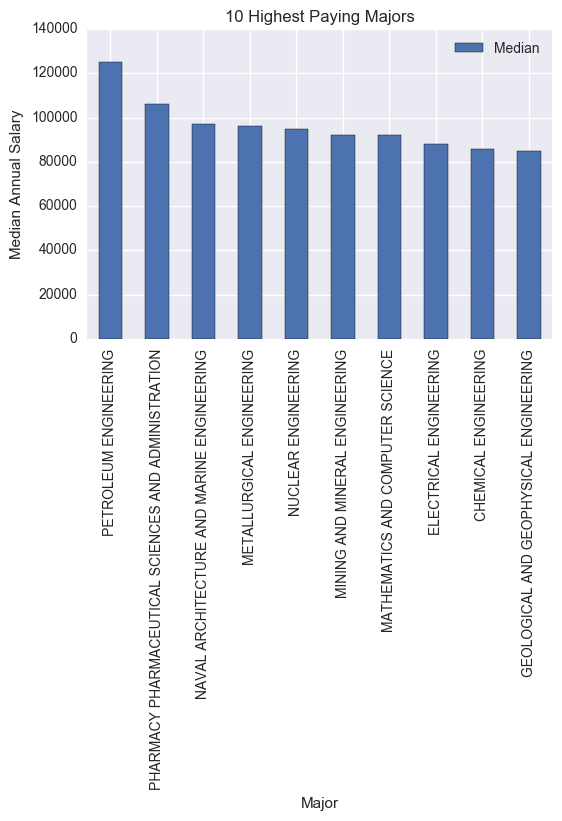

In [44]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

high_pay_majors.plot(x='Major', y='Median', kind='bar', title='10 Highest Paying Majors')
plt.xlabel('Major')
plt.ylabel('Median Annual Salary')

In [45]:
# 5. What is the average median salary for each major category?


mcat_median=majors[['Major_category', 'Median']]

msal_mcat=pd.DataFrame(mcat_median.groupby('Major_category').Median.mean())

print msal_mcat

                                           Median
Major_category                                   
Agriculture & Natural Resources      55000.000000
Arts                                 43525.000000
Biology & Life Science               50821.428571
Business                             60615.384615
Communications & Journalism          49500.000000
Computers & Mathematics              66272.727273
Education                            43831.250000
Engineering                          77758.620690
Health                               56458.333333
Humanities & Liberal Arts            46080.000000
Industrial Arts & Consumer Services  52642.857143
Interdisciplinary                    43000.000000
Law & Public Policy                  52800.000000
Physical Sciences                    62400.000000
Psychology & Social Work             44555.555556
Social Science                       53222.222222


In [46]:
# 6. Show only the top 5 paying major categories

msal_mcat.sort_values(by='Median', ascending=False).head()

,Median
Major_category,
Engineering,77758.620690
Computers & Mathematics,66272.727273
Physical Sciences,62400.000000
Business,60615.384615
Health,56458.333333


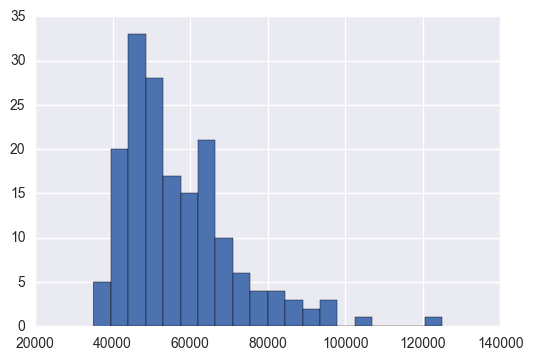

In [47]:
# 7. Plot a histogram of the distribution of median salaries

majors.Median.hist(bins=20)

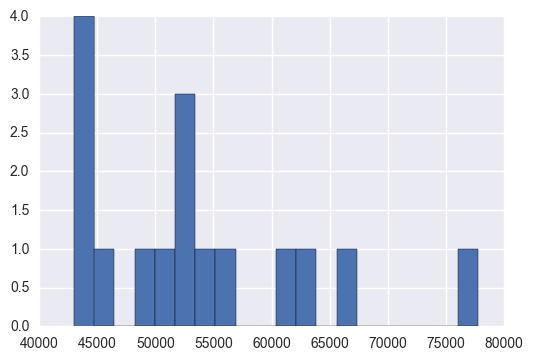

In [48]:
# 8. Plot a histogram of the distribution of median salaries by major category

msal_mcat.Median.hist(bins=20)

In [49]:
# 9. What are the top 10 most UNemployed majors?

majors[['Major', 'Unemployed']].sort_values(by='Unemployed', ascending=False).head(10)

,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [50]:
# What are the unemployment rates?

majors[['Major', 'Unemployed', 'Unemployment_rate']].sort_values(by='Unemployed', ascending=False).head(10)

,Major,Unemployed,Unemployment_rate
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261,0.058865
158,GENERAL BUSINESS,85626,0.051378
114,PSYCHOLOGY,79066,0.069667
159,ACCOUNTING,75379,0.053415
13,COMMUNICATIONS,54390,0.064360
73,ENGLISH LANGUAGE AND LITERATURE,52248,0.068645
164,MARKETING AND MARKETING RESEARCH,51839,0.055033
132,POLITICAL SCIENCE AND GOVERNMENT,40376,0.069374
25,GENERAL EDUCATION,38742,0.043904
78,BIOLOGY,36757,0.059301


In [51]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

unem_cat = pd.DataFrame(majors[['Major_category', 'Unemployed']].groupby('Major_category').Unemployed.mean())

unem_cat.sort_values(by='Unemployed', ascending=False).head(10)

# What are the unemployment rates?

,Unemployed
Major_category,
Business,33415.153846
Communications & Journalism,25299.750000
Social Science,14683.333333
Arts,13015.625000
Humanities & Liberal Arts,11942.400000
Psychology & Social Work,11578.444444
Law & Public Policy,8609.800000
Education,7833.500000
Computers & Mathematics,7270.363636


In [52]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

majors['sample_employment_rate'] = majors.Employed / majors.Total
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [53]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

majors['sample_unemployment_rate_1'] = 1 - majors.sample_employment_rate
majors['sample_unemployment_rate_2'] = majors.Unemployed / majors.Total
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate_1,sample_unemployment_rate_2
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775,0.018908
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662,0.023771
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827,0.024179
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052,0.034950
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262,0.036820
